In [2]:
# sources:
# MultiFC - evidence based fact checking: https://competitions.codalab.org/competitions/21163 (pending)
# PHEME - rumour detection: https://figshare.com/articles/PHEME_dataset_for_Rumour_Detection_and_Veracity_Classification/6392078
# Fake news: https://www.kaggle.com/mrisdal/fake-news
# Liar, Liar Pants On Fire - fake news: https://github.com/thiagorainmaker77/liar_dataset
# Fake News Challenge: https://github.com/FakeNewsChallenge/fnc-1-baseline 
# Fever - fake news workshops: https://fever.ai/
# Rumor- https://www.kaggle.com/arminehn/rumor-citation

#import files
import zipfile, tarfile
import requests

fake = zipfile.ZipFile('../data/fake-news.zip', 'r')
fnc = zipfile.ZipFile('../data/fnc-1-master.zip', 'r')
liar = zipfile.ZipFile('../data/liar_dataset.zip', 'r')
pheme = zipfile.ZipFile('../data/PHEME.zip', 'r')
fever = requests.get('https://s3-eu-west-1.amazonaws.com/fever.public/fever2-fixers-dev.jsonl')
rumor = zipfile.ZipFile('../data/rumor-citation.zip', 'r')

zips = [fake, fnc, liar, pheme, rumor]
for file in zips:
    file.printdir()
    print('\n')

pheme_tar = tarfile.open(pheme.extract('PHEME_veracity.tar.bz2'))
    
print(fever)

File Name                                             Modified             Size
fake.csv                                       2019-09-20 02:14:32     56680002


File Name                                             Modified             Size
fnc-1-master/                                  2017-06-14 23:58:08            0
fnc-1-master/README.md                         2017-06-14 23:58:08          962
fnc-1-master/competition_test_bodies.csv       2017-06-14 23:58:08      2045680
fnc-1-master/competition_test_stances.csv      2017-06-14 23:58:08      2177588
fnc-1-master/competition_test_stances_unlabeled.csv 2017-06-14 23:58:08      1940688
fnc-1-master/scorer.py                         2017-06-14 23:58:08         4617
fnc-1-master/test_bodies.csv                   2017-06-14 23:58:08      2045680
fnc-1-master/test_stances_unlabeled.csv        2017-06-14 23:58:08      1940688
fnc-1-master/train_bodies.csv                  2017-06-14 23:58:08      3752301
fnc-1-master/train_stances.csv   

In [3]:
# get data from files and convert to pandas

import io

fake_csv = io.TextIOWrapper(fake.open('fake.csv'))
fnc_train_csvs = [io.TextIOWrapper(fnc.open('fnc-1-master/train_bodies.csv')), io.TextIOWrapper(fnc.open('fnc-1-master/train_stances.csv'))]
fnc_test_csvs = [io.TextIOWrapper(fnc.open('fnc-1-master/test_bodies.csv')), io.TextIOWrapper(fnc.open('fnc-1-master/test_stances_unlabeled.csv'))]
liar_train_tsv = io.TextIOWrapper(liar.open('train.tsv'))
liar_test_tsv = io.TextIOWrapper(liar.open('test.tsv'))  
rumor_csvs = io.TextIOWrapper(rumor.open('emergent.csv')), io.TextIOWrapper(rumor.open('politifact.csv')), io.TextIOWrapper(rumor.open('snopes.csv'))

import pandas as p

fake_df = p.read_csv(fake_csv)
fnc_train_dfs = [p.read_csv(fnc_train_csvs[0]), p.read_csv(fnc_train_csvs[1])]
fnc_test_dfs = [p.read_csv(fnc_test_csvs[0]), p.read_csv(fnc_test_csvs[1])]
liar_train_df = p.read_table(liar_train_tsv,
                             names = ['id','label','statement',
                                      'subject','speaker','job',
                                      'state','party','barely_true_c',
                                      'false_c','half_true_c','mostly_true_c',
                                      'pants_on_fire_c','venue'])
liar_test_df = p.read_table(liar_test_tsv,
                             names = ['id','label','statement',
                                      'subject','speaker','job',
                                      'state','party','barely_true_c',
                                      'false_c','half_true_c','mostly_true_c',
                                      'pants_on_fire_c','venue'])
rumor_dfs = [p.read_csv(rumor_csvs[0]), p.read_csv(rumor_csvs[1]), p.read_csv(rumor_csvs[2])]

import json
feverlines = [json.loads(line) for line in fever.text.splitlines()]
fever_df = p.DataFrame(feverlines)

In [4]:
print('Columns\nFake:')
print(fake_df.columns)
print('\nFNC bodies:')
print(fnc_train_dfs[0].columns)
print('\nFNC stances:')
print(fnc_train_dfs[1].columns)
print('\nLiar:')
print(liar_train_df.columns)
print('\FEVER:')
print(fever_df.columns)
print('\nRumor Citation Emergent:')
print(rumor_dfs[0].columns)
print('\nRumor Citation Politifact:')
print(rumor_dfs[1].columns)
print('\nRumor Citation Snopes:')
print(rumor_dfs[2].columns)

Columns
Fake:
Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

FNC bodies:
Index(['Body ID', 'articleBody'], dtype='object')

FNC stances:
Index(['Headline', 'Body ID', 'Stance'], dtype='object')

Liar:
Index(['id', 'label', 'statement', 'subject', 'speaker', 'job', 'state',
       'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c',
       'pants_on_fire_c', 'venue'],
      dtype='object')
\FEVER:
Index(['id', 'label', 'claim', 'evidence', 'original_id', 'transformation',
       'attack', 'annotation'],
      dtype='object')

Rumor Citation Emergent:
Index(['emergent_page', 'claim', 'claim_description', 'claim_label', 'tags',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_ur

In [5]:
print('Shapes\nFake:')
print(fake_df.shape)
print('\nFNC bodies train:')
print(fnc_train_dfs[0].shape)
print('\nFNC stances train:')
print(fnc_train_dfs[1].shape)
print('\nFNC bodies test:')
print(fnc_test_dfs[0].shape)
print('\nFNC stances test:')
print(fnc_test_dfs[1].shape)
print('\nLiar train:')
print(liar_train_df.shape)
print('\nLiar test:')
print(liar_test_df.shape)
print('\nFEVER:')
print(fever_df.shape)
print('\nRumor Citation Emergent:')
print(rumor_dfs[0].shape)
print('\nRumor Citation Politifact:')
print(rumor_dfs[1].shape)
print('\nRumor Citation Snopes:')
print(rumor_dfs[2].shape)

Shapes
Fake:
(12999, 20)

FNC bodies train:
(1683, 2)

FNC stances train:
(49972, 3)

FNC bodies test:
(904, 2)

FNC stances test:
(25413, 2)

Liar train:
(10240, 14)

Liar test:
(1267, 14)

FEVER:
(1174, 8)

Rumor Citation Emergent:
(2145, 15)

Rumor Citation Politifact:
(2923, 12)

Rumor Citation Snopes:
(16865, 12)


In [6]:
# time to clean!

import numpy as np

fake_df = fake_df.drop('main_img_url', axis = 1)


In [7]:
fake_df.domain_rank = fake_df.domain_rank.fillna(np.average(fake_df.domain_rank.dropna()))

In [8]:
fake_df.author = fake_df.author.fillna('')
fake_df.title = fake_df.title.fillna('')
fake_df.thread_title = fake_df.thread_title.fillna('')
fake_df.country = fake_df.country.fillna('')
fake_df.text = fake_df.text.fillna('')

In [9]:
liar_train_df = liar_train_df.dropna(subset=['subject'])

liar_train_df.job = liar_train_df.job.fillna('')
liar_test_df.job = liar_test_df.job.fillna('')
liar_train_df.state = liar_train_df.state.fillna('')
liar_test_df.state = liar_test_df.state.fillna('')
liar_train_df.venue = liar_train_df.venue.fillna('')
liar_test_df.venue = liar_test_df.venue.fillna('')

fever_df.transformation = fever_df.transformation.fillna('')
fever_df.original_id = fever_df.original_id.fillna('')

In [10]:
rumor_dfs[0].claim_description = rumor_dfs[0].claim_description.fillna('')
rumor_dfs[0].tags = rumor_dfs[0].tags.fillna('')
rumor_dfs[0].page_headline = rumor_dfs[0].page_headline.fillna('')
rumor_dfs[0] = rumor_dfs[0].dropna(subset=['page_domain'])
rumor_dfs[0] = rumor_dfs[0].drop(['page_position'], axis=1)

In [11]:
rumor_dfs[1].page_url = rumor_dfs[1].page_url.fillna('')
rumor_dfs[2].topic = rumor_dfs[2].topic.fillna('')
rumor_dfs[2].date_updated = rumor_dfs[2].date_updated.fillna('')
rumor_dfs[2].page_url = rumor_dfs[2].page_url.fillna('')
rumor_dfs[2].tags = rumor_dfs[2].tags.fillna('')
rumor_dfs[2] = rumor_dfs[2].dropna(subset=['claim'])

In [12]:
# all clean

print('Missing Data\nFake:')
print(fake_df.isnull().sum())
print('\nFNC bodies train:')
print(fnc_train_dfs[0].isnull().sum())
print('\nFNC stances train:')
print(fnc_train_dfs[1].isnull().sum())
print('\nFNC bodies test:')
print(fnc_test_dfs[0].isnull().sum())
print('\nFNC stances test:')
print(fnc_test_dfs[1].isnull().sum())
print('\nLiar train:')
print(liar_train_df.isnull().sum())
print('\nLiar test:')
print(liar_test_df.isnull().sum())
print('\nFEVER:')
print(fever_df.isnull().sum())
print('\nRumor Citation Emergent:')
print(rumor_dfs[0].isnull().sum())
print('\nRumor Citation Politifact:')
print(rumor_dfs[1].isnull().sum())
print('\nRumor Citation Snopes:')
print(rumor_dfs[2].isnull().sum())

Missing Data
Fake:
uuid                  0
ord_in_thread         0
author                0
published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
country               0
domain_rank           0
thread_title          0
spam_score            0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
dtype: int64

FNC bodies train:
Body ID        0
articleBody    0
dtype: int64

FNC stances train:
Headline    0
Body ID     0
Stance      0
dtype: int64

FNC bodies test:
Body ID        0
articleBody    0
dtype: int64

FNC stances test:
Headline    0
Body ID     0
dtype: int64

Liar train:
id                 0
label              0
statement          0
subject            0
speaker            0
job                0
state              0
party              0
barely_true_c      0
false_c            0
half_true_c        0
mo

In [13]:
print(rumor_dfs[0].tags)
print(rumor_dfs[1].tags)
print(rumor_dfs[2].tags)

import re

emergent_pattern = re.compile(re.escape(r'.*(+.*)*'))

rumor_dfs[0].tags = rumor_dfs[0].tags.apply(lambda x: x.replace('+', " ").split(','))
rumor_dfs[1].tags = rumor_dfs[1].tags.apply(lambda x: x.replace('+', " ").split(','))
rumor_dfs[2].tags = rumor_dfs[2].tags.apply(lambda x: x.replace('+', " ").split(','))

0       Daiane+DeJesus,DC+Toys+Collector,Porm,Sandy+Su...
1       Daiane+DeJesus,DC+Toys+Collector,Porm,Sandy+Su...
2       Daiane+DeJesus,DC+Toys+Collector,Porm,Sandy+Su...
3       Australia,Food,Hamburger,McDonald's,Quarter+Po...
4       Australia,Food,Hamburger,McDonald's,Quarter+Po...
                              ...                        
2140    Apple+Watch,Daisuke+Wakabayashi,Wall+Street+Jo...
2141    Apple+Watch,Daisuke+Wakabayashi,Wall+Street+Jo...
2142    Apple+Watch,Daisuke+Wakabayashi,Wall+Street+Jo...
2143    Apple+Watch,Daisuke+Wakabayashi,Wall+Street+Jo...
2144    Apple+Watch,Daisuke+Wakabayashi,Wall+Street+Jo...
Name: tags, Length: 2144, dtype: object
0       Fake news
1       Fake news
2       Fake news
3       Fake news
4       Fake news
          ...    
2918      History
2919      History
2920      History
2921      History
2922      History
Name: tags, Length: 2923, dtype: object
0                                              
1                                   

In [14]:
fake_df.plot(x='spam_score', y='domain_rank', kind='scatter', title='Fake')
# no correlation b/w spam score and domain rank ???

In [15]:
fake_df.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

Text(0.5, 0.98, 'Fake')

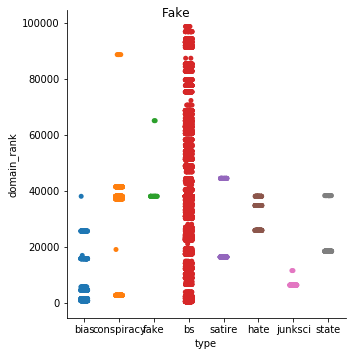

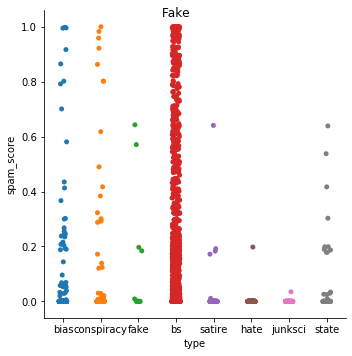

In [16]:
import seaborn as sns

sns.catplot(x="type", y="domain_rank", data=fake_df).fig.suptitle('Fake')
sns.catplot(x="type", y="spam_score", data=fake_df).fig.suptitle('Fake')

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64


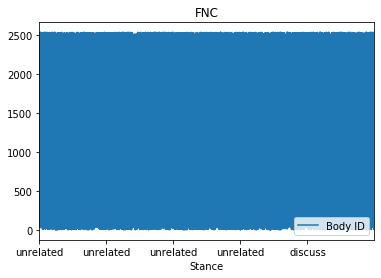

In [17]:
fnc_train_dfs[1].plot(x='Stance', kind='line', title="FNC")
# looks good - useable!
print(fnc_train_dfs[1].Stance.value_counts())

In [18]:
liar_train_df[:1]
#truth data is float in multiple columns - not sure how to combine

,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29533190>,
      dtype=object)

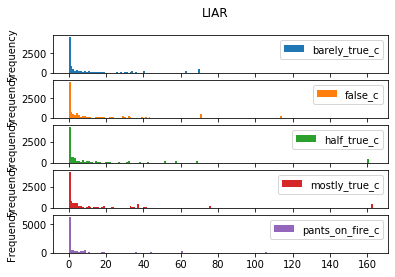

In [19]:
liar_train_df.plot(kind='hist', subplots = True, title = "LIAR", bins = 160)
#one for highest value in each row, regularize

In [20]:
liar_counts = []
liar_counts.append(liar_train_df[liar_train_df.pants_on_fire_c > 0].pants_on_fire_c.count())
liar_counts.append(liar_train_df[liar_train_df.false_c > 0].false_c.count())
liar_counts.append(liar_train_df[liar_train_df.barely_true_c > 0].barely_true_c.count())
liar_counts.append(liar_train_df[liar_train_df.half_true_c > 0].half_true_c.count())
liar_counts.append(liar_train_df[liar_train_df.mostly_true_c > 0].mostly_true_c.count())
sum(liar_counts)
# ~35,000 non-zero rating for ~10,000 rows - ~3.5 per row!
print(liar_counts)

[5469, 7428, 7213, 7637, 7487]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2915b8d0>,
      dtype=object)

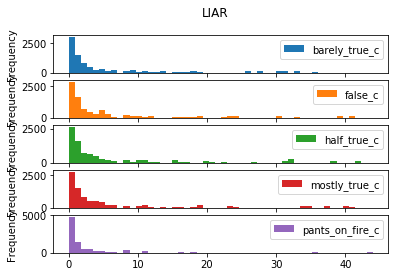

In [21]:
liar_train_df = liar_train_df[liar_train_df.pants_on_fire_c < 51]
liar_train_df = liar_train_df[liar_train_df.false_c < 51]
liar_train_df = liar_train_df[liar_train_df.barely_true_c < 51]
liar_train_df = liar_train_df[liar_train_df.half_true_c < 51]
liar_train_df = liar_train_df[liar_train_df.mostly_true_c < 51]
liar_train_df.plot(kind='hist', subplots = True, title = "LIAR", bins = 50)
#one for highest value in each row, regularize

In [22]:
liar_counts = []
liar_counts.append(liar_train_df[liar_train_df.pants_on_fire_c > 0].pants_on_fire_c.count())
liar_counts.append(liar_train_df[liar_train_df.false_c > 0].false_c.count())
liar_counts.append(liar_train_df[liar_train_df.barely_true_c > 0].barely_true_c.count())
liar_counts.append(liar_train_df[liar_train_df.half_true_c > 0].half_true_c.count())
liar_counts.append(liar_train_df[liar_train_df.mostly_true_c > 0].mostly_true_c.count())
sum(liar_counts)
# ~35,000 non-zero rating for ~10,000 rows - ~3.5 per row!
print(liar_counts)

[4151, 6110, 5895, 6319, 6169]


In [23]:
fever_df.evidence
#won't use this - not sure what values mean, content sources are weird (movies, music, etc.)

0                          [[[269158, None, None, None]]]
1                     [[[141141, 156349, Simon_Pegg, 0]]]
2       [[[25977, 31918, Exotic_Birds, 2], [25977, 319...
3       [[[None, None, The_Nice_Guys, 0], [None, None,...
4       [[[None, None, Rupert_Murdoch, 1], [None, None...
                              ...                        
1169      [[[179017, None, Macklemore_&_Ryan_Lewis, -1]]]
1170                [[[24966, 30831, Stomp_the_Yard, 0]]]
1171       [[[49192, 58517, Meteora_-LRB-horse-RRB-, 0]]]
1172    [[[238922, 240894, The_Chaperone_-LRB-film-RRB...
1173     [[[93188, 106109, Night_of_the_Living_Dead, 0]]]
Name: evidence, Length: 1174, dtype: object

In [24]:
print(rumor_dfs[0].columns)
print(rumor_dfs[1].columns)
print(rumor_dfs[2].columns)

Index(['emergent_page', 'claim', 'claim_description', 'claim_label', 'tags',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_url', 'page_headline', 'page_shares',
       'page_order'],
      dtype='object')
Index(['politifact_page', 'claim', 'claim_source', 'claim_citation',
       'claim_label', 'date_published', 'researched_by', 'edited_by', 'tags',
       'page_citation', 'page_url', 'page_is_first_citation'],
      dtype='object')
Index(['snopes_page', 'topic', 'claim', 'claim_label', 'date_published',
       'date_updated', 'page_url', 'page_is_example', 'page_is_image_credit',
       'page_is_archived', 'page_is_first_citation', 'tags'],
      dtype='object')


In [25]:
print(rumor_dfs[0].claim_label.value_counts())
print(rumor_dfs[1].claim_label.value_counts())
print(rumor_dfs[2].claim_label.value_counts())

Unverified    857
TRUE          737
FALSE         550
Name: claim_label, dtype: int64
pants-fire     1110
false           731
barely-true     460
half-true       244
mostly-true     207
true            171
Name: claim_label, dtype: int64
false           8765
mfalse          3319
mixture         2618
true            1480
mtrue            487
undetermined     151
legend            42
Name: claim_label, dtype: int64


rumor_dfs[0]

In [26]:
rumor_dfs[2]

,snopes_page,topic,claim,claim_label,date_published,date_updated,page_url,page_is_example,page_is_image_credit,page_is_archived,page_is_first_citation,tags
0,http://www.snopes.com/georgia-bans-muslim-cult...,politics,Georgia recently became the first U.S. state t...,false,"Nov 17th, 2016","Mar 20th, 2017",http://www.legis.ga.gov/Legislation/en-US/disp...,False,False,False,True,[]
1,http://www.snopes.com/georgia-bans-muslim-cult...,politics,Georgia recently became the first U.S. state t...,false,"Nov 17th, 2016","Mar 20th, 2017",http://arabsinamerica.unc.edu/identity/veiling...,False,False,False,False,[]
2,http://www.snopes.com/georgia-bans-muslim-cult...,politics,Georgia recently became the first U.S. state t...,false,"Nov 17th, 2016","Mar 20th, 2017",http://www.wisegeek.com/what-is-a-niqab.htm,False,False,False,False,[]
3,http://www.snopes.com/georgia-bans-muslim-cult...,politics,Georgia recently became the first U.S. state t...,false,"Nov 17th, 2016","Mar 20th, 2017",http://www.wsbtv.com/news/local/new-bill-would...,False,False,False,False,[]
4,http://www.snopes.com/georgia-bans-muslim-cult...,politics,Georgia recently became the first U.S. state t...,false,"Nov 17th, 2016","Mar 20th, 2017",http://www.house-press.com/?p=6060,False,False,False,False,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
16860,http://snopes.com//mexico-guatemala-border/,fauxtography,Photographs show a border fence between the co...,false,"Aug 26th, 2015","Jan 27th, 2017",https://www.quora.com/Does-Mexico-have-a-wall-...,False,False,False,False,"[politics, guatemala, donald-trump, mexico]"
16861,http://snopes.com//mexico-guatemala-border/,fauxtography,Photographs show a border fence between the co...,false,"Aug 26th, 2015","Jan 27th, 2017",http://fusion.net/story/124671/as-mexico-tight...,False,False,False,False,"[politics, guatemala, donald-trump, mexico]"
16862,http://snopes.com//mexico-guatemala-border/,fauxtography,Photographs show a border fence between the co...,false,"Aug 26th, 2015","Jan 27th, 2017",http://www.defendersblog.org/2013/06/on-the-li...,False,False,False,False,"[politics, guatemala, donald-trump, mexico]"
16863,http://snopes.com//mexico-guatemala-border/,fauxtography,Photographs show a border fence between the co...,false,"Aug 26th, 2015","Jan 27th, 2017",http://www.i24news.tv/en/news/israel/diplomacy...,False,False,False,False,"[politics, guatemala, donald-trump, mexico]"
